In [ ]:
# IMPLEMENTING CONVENTIONAL CNN ARCHITECTURES AND TRANSFER LEARNING
# LeNet-5 and AlexNet architecture
# VGG-16 , GoogleNet, ResNet50 ,EfficientNetB0 ,MobileNetV2

In [1]:
import zipfile
import os 
import tensorflow as tf
import numpy as np
import pandas as pd
from keras import optimizers
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2023-08-30 10:20:44.207080: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-30 10:20:44.235983: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-30 10:20:44.709482: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


1.Lenet-5 ARCHITECTURE

In [2]:
zip_file_path = 'cats_and_dogs_filtered.zip'

# Extract the contents of the zip file to a directory
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/tmp')
    
    # Path to the extracted directory
data_directory = '/tmp/cats_and_dogs_filtered'

# Define the data generator
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,  # Scale pixel values to the range [0, 1]
    # Other data augmentation parameters can be added here
)

# Create a data generator for training data
train_generator = train_datagen.flow_from_directory(
    directory=data_directory,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

Found 3000 images belonging to 2 classes.


In [3]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
test_datagen = ImageDataGenerator(rescale=1.0/255)

In [4]:
test_generator = test_datagen.flow_from_directory(
    directory=data_directory,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

Found 3000 images belonging to 2 classes.


In [5]:
model = Sequential([
    Conv2D(6, (5, 5), activation='tanh', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(16, (5, 5), activation='tanh'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(120, activation='relu'),
    Dense(84, activation='relu'),
    Dense(1, activation='sigmoid')
])

2023-08-30 10:20:46.171814: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-08-30 10:20:46.196204: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-08-30 10:20:46.196353: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 60, 60, 6)         456       
                                                                 
 max_pooling2d (MaxPooling2  (None, 30, 30, 6)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 16)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 2704)              0         
                                                                 
 dense (Dense)               (None, 120)               3

In [7]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [8]:
history = model.fit(train_generator,epochs=10,validation_data=test_generator)

Epoch 1/10


2023-08-30 10:20:47.873516: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2023-08-30 10:20:48.750150: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-08-30 10:20:48.758649: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x1ebfd770 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-08-30 10:20:48.758661: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2023-08-30 10:20:48.761915: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-08-30 10:20:48.838370: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the proce

94/94 [==============================] - 7s 41ms/step - loss: 0.6492 - accuracy: 0.6617 - val_loss: 0.6347 - val_accuracy: 0.6667
Epoch 2/10
94/94 [==============================] - 4s 38ms/step - loss: 0.6387 - accuracy: 0.6667 - val_loss: 0.6350 - val_accuracy: 0.6667
Epoch 3/10
94/94 [==============================] - 4s 38ms/step - loss: 0.6359 - accuracy: 0.6663 - val_loss: 0.6253 - val_accuracy: 0.6667
Epoch 4/10
94/94 [==============================] - 4s 38ms/step - loss: 0.6259 - accuracy: 0.6670 - val_loss: 0.6010 - val_accuracy: 0.6680
Epoch 5/10
94/94 [==============================] - 4s 38ms/step - loss: 0.6076 - accuracy: 0.6747 - val_loss: 0.5621 - val_accuracy: 0.6827
Epoch 6/10
94/94 [==============================] - 4s 38ms/step - loss: 0.5796 - accuracy: 0.6987 - val_loss: 0.5320 - val_accuracy: 0.7473
Epoch 7/10
94/94 [==============================] - 4s 38ms/step - loss: 0.5318 - accuracy: 0.7360 - val_loss: 0.4515 - val_accuracy: 0.8160
Epoch 8/10
94/94 [======

In [9]:
history1 = model.evaluate(test_generator)

94/94 [==============================] - 2s 19ms/step - loss: 0.1095 - accuracy: 0.9693


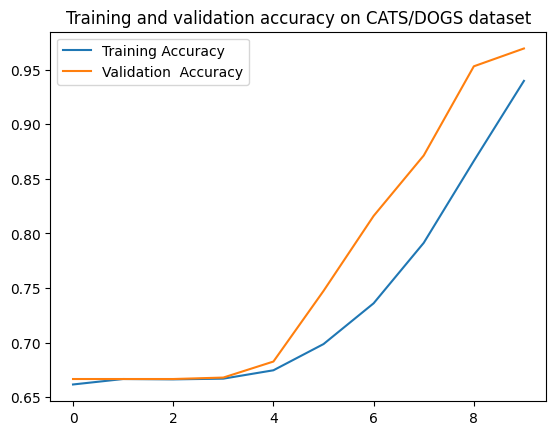

In [10]:
training_acc = history.history['accuracy']
validation_acc = history.history['val_accuracy']
plt.plot(training_acc, label='Training Accuracy')
plt.plot(validation_acc, label='Validation  Accuracy')
plt.legend()
plt.title('Training and validation accuracy on CATS/DOGS dataset')
plt.show()

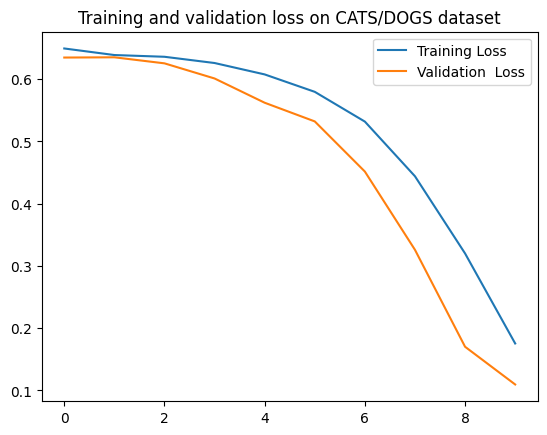

In [11]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation  Loss')
plt.legend()
plt.title('Training and validation loss on CATS/DOGS dataset')
plt.show()

In [12]:
train_generator1 = train_datagen.flow_from_directory(
    directory=data_directory,
    target_size=(64, 64),  # Adjust the target size as needed
    batch_size=32,
    class_mode='binary'
)

Found 3000 images belonging to 2 classes.


In [13]:
test_generator1 = train_datagen.flow_from_directory(
    directory=data_directory,
    target_size=(64, 64),  # Adjust the target size as needed
    batch_size=32,
    class_mode='binary'
)

Found 3000 images belonging to 2 classes.


In [14]:
model1 = Sequential([
    Conv2D(6, (5, 5), activation='tanh', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(16, (5, 5), activation='tanh'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(120, activation='relu'),
    Dense(84, activation='relu'),
    Dense(1, activation='sigmoid')
])

#creating the lenet-5 architecture with 2 convolution layers and FCNN with 120,84,1 layers in input,hidden,output layers

In [15]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 60, 60, 6)         456       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 6)         0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 16)        2416      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 13, 13, 16)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 2704)              0         
                                                                 
 dense_3 (Dense)             (None, 120)              

In [16]:
model1.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [17]:
history1 = model1.fit(train_generator1,epochs=10,validation_data=test_generator1)

Epoch 1/10
94/94 [==============================] - 7s 67ms/step - loss: 0.6481 - accuracy: 0.6607 - val_loss: 0.6469 - val_accuracy: 0.6667
Epoch 2/10
94/94 [==============================] - 6s 67ms/step - loss: 0.6465 - accuracy: 0.6597 - val_loss: 0.6918 - val_accuracy: 0.6667
Epoch 3/10
94/94 [==============================] - 6s 67ms/step - loss: 0.6439 - accuracy: 0.6660 - val_loss: 0.6406 - val_accuracy: 0.6667
Epoch 4/10
94/94 [==============================] - 6s 68ms/step - loss: 0.6401 - accuracy: 0.6667 - val_loss: 0.6493 - val_accuracy: 0.6667
Epoch 5/10
94/94 [==============================] - 6s 67ms/step - loss: 0.6416 - accuracy: 0.6660 - val_loss: 0.6357 - val_accuracy: 0.6667
Epoch 6/10
94/94 [==============================] - 6s 67ms/step - loss: 0.6367 - accuracy: 0.6667 - val_loss: 0.6316 - val_accuracy: 0.6667
Epoch 7/10
94/94 [==============================] - 6s 66ms/step - loss: 0.6352 - accuracy: 0.6667 - val_loss: 0.6315 - val_accuracy: 0.6670
Epoch 8/10
94

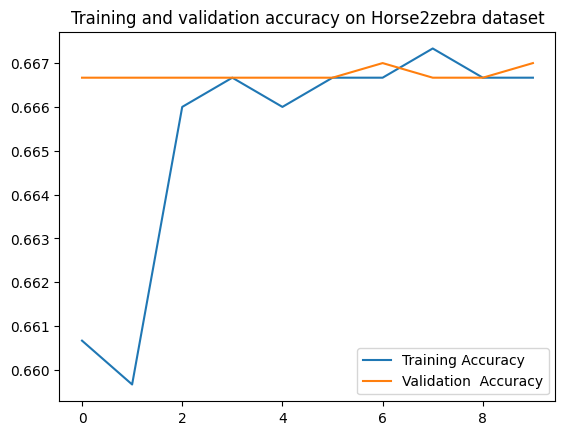

In [18]:
training_acc1 = history1.history['accuracy']
validation_acc1 = history1.history['val_accuracy']
plt.plot(training_acc1, label='Training Accuracy')
plt.plot(validation_acc1, label='Validation  Accuracy')
plt.legend()
plt.title('Training and validation accuracy on Horse2zebra dataset')
plt.show()

#with this learning curve we can say that after 15 epochs the accuracy drops hence limit the epochs to 15

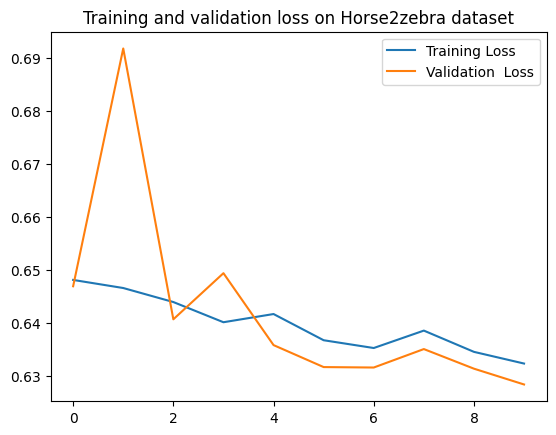

In [19]:
train_loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']
plt.plot(train_loss1, label='Training Loss')
plt.plot(val_loss1, label='Validation  Loss')
plt.legend()
plt.title('Training and validation loss on Horse2zebra dataset')
plt.show()

#with this we can conclude that the epochs should be limited to 15 as the loss is increasing after 15

2.AlexNet architecture

In [20]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1.0/255)

alextrain_generator = train_datagen.flow_from_directory(
    directory=data_directory,
    target_size=(227, 227),  # AlexNet input size
    batch_size=32,
    class_mode='binary'
)

Found 3000 images belonging to 2 classes.


In [21]:
alextest_generator = test_datagen.flow_from_directory(
    directory=data_directory,
    target_size=(227, 227),
    batch_size=32,
    class_mode='binary'
)

Found 3000 images belonging to 2 classes.


In [22]:
alexmodel = Sequential([
    Conv2D(96, (11, 11), strides=(4, 4), activation='relu', input_shape=(227, 227, 3)),
    MaxPooling2D((3, 3), strides=(2, 2)),
    Conv2D(256, (5, 5), padding='same', activation='relu'),
    MaxPooling2D((3, 3), strides=(2, 2)),
    Conv2D(384, (3, 3), padding='same', activation='relu'),
    Conv2D(384, (3, 3), padding='same', activation='relu'),
    Conv2D(256, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((3, 3), strides=(2, 2)),
    Flatten(),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

In [23]:
alexmodel.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [24]:
alexhistory1 = alexmodel.fit(alextrain_generator, epochs=10, validation_data=alextest_generator)

Epoch 1/10
94/94 [==============================] - 21s 192ms/step - loss: 0.9157 - accuracy: 0.6583 - val_loss: 0.6386 - val_accuracy: 0.6667
Epoch 2/10
94/94 [==============================] - 18s 188ms/step - loss: 0.6389 - accuracy: 0.6667 - val_loss: 0.6381 - val_accuracy: 0.6667
Epoch 3/10
94/94 [==============================] - 18s 188ms/step - loss: 0.6386 - accuracy: 0.6667 - val_loss: 0.6365 - val_accuracy: 0.6667
Epoch 4/10
94/94 [==============================] - 18s 188ms/step - loss: 0.6386 - accuracy: 0.6667 - val_loss: 0.6381 - val_accuracy: 0.6667
Epoch 5/10
94/94 [==============================] - 18s 190ms/step - loss: 0.6384 - accuracy: 0.6667 - val_loss: 0.6372 - val_accuracy: 0.6667
Epoch 6/10
94/94 [==============================] - 18s 187ms/step - loss: 0.6372 - accuracy: 0.6667 - val_loss: 0.6416 - val_accuracy: 0.6667
Epoch 7/10
94/94 [==============================] - 18s 188ms/step - loss: 0.6387 - accuracy: 0.6667 - val_loss: 0.6368 - val_accuracy: 0.6667

In [25]:
alexmodel.evaluate(alextest_generator)

94/94 [==============================] - 3s 29ms/step - loss: 0.6366 - accuracy: 0.6667


[0.6366204619407654, 0.6666666865348816]

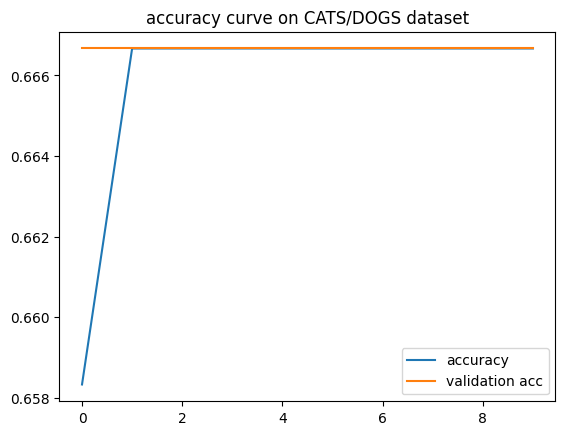

In [26]:
alexacc = alexhistory1.history['accuracy']
alexvalacc = alexhistory1.history['val_accuracy']
plt.plot(alexacc,label='accuracy')
plt.plot(alexvalacc,label='validation acc')
plt.legend()
plt.title('accuracy curve on CATS/DOGS dataset')
plt.show()

In [27]:
from keras.applications.vgg16 import VGG16
base_model = VGG16(input_shape=(224,224,3), weights='imagenet', include_top=False)
base_model.trainable = False #freeze the layers
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [28]:
import tensorflow as tf
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

model.compile(loss = 'binary_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 25088)             0         
                                                                 
 dense_9 (Dense)             (None, 1)                 25089     
                                                                 
Total params: 14739777 (56.23 MB)
Trainable params: 25089 (98.00 KB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [29]:
from tensorflow.keras.utils import plot_model
plot_model(model,  show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [30]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 25088)             0         
                                                                 
 dense_9 (Dense)             (None, 1)                 25089     
                                                                 
Total params: 14739777 (56.23 MB)
Trainable params: 25089 (98.00 KB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [32]:
train_generator = train_datagen.flow_from_directory(
    directory=data_directory,
    target_size=(224,224),  # Adjust the target size as needed
    batch_size=20,
    class_mode='binary'
)

Found 3000 images belonging to 2 classes.


In [33]:
validation_generator = val_datagen.flow_from_directory(
    directory=data_directory,
    target_size=(224, 224),
    batch_size=20,
    class_mode='binary'
)

Found 3000 images belonging to 2 classes.


In [34]:
history2 = model.fit(train_generator,epochs=10,validation_data=validation_generator)

Epoch 1/10
150/150 [==============================] - 23s 148ms/step - loss: 0.6659 - acc: 0.6493 - val_loss: 0.6245 - val_acc: 0.6720
Epoch 2/10
150/150 [==============================] - 22s 148ms/step - loss: 0.6324 - acc: 0.6607 - val_loss: 0.6040 - val_acc: 0.6687
Epoch 3/10
150/150 [==============================] - 22s 147ms/step - loss: 0.5985 - acc: 0.6747 - val_loss: 0.5661 - val_acc: 0.6983
Epoch 4/10
150/150 [==============================] - 22s 147ms/step - loss: 0.5744 - acc: 0.6960 - val_loss: 0.5442 - val_acc: 0.7280
Epoch 5/10
150/150 [==============================] - 22s 148ms/step - loss: 0.5548 - acc: 0.7133 - val_loss: 0.5238 - val_acc: 0.7153
Epoch 6/10
150/150 [==============================] - 22s 148ms/step - loss: 0.5305 - acc: 0.7313 - val_loss: 0.5075 - val_acc: 0.7957
Epoch 7/10
150/150 [==============================] - 22s 148ms/step - loss: 0.5191 - acc: 0.7473 - val_loss: 0.4889 - val_acc: 0.8080
Epoch 8/10
150/150 [==============================] - 2

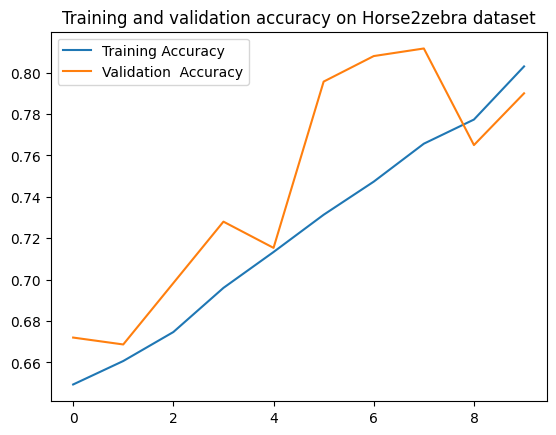

In [35]:
training_acc1 = history2.history['acc']
validation_acc1 = history2.history['val_acc']
plt.plot(training_acc1, label='Training Accuracy')
plt.plot(validation_acc1, label='Validation  Accuracy')
plt.legend()
plt.title('Training and validation accuracy on Horse2zebra dataset')
plt.show()

#with this learning curve we can say that after 15 epochs the accuracy drops hence limit the epochs to 15

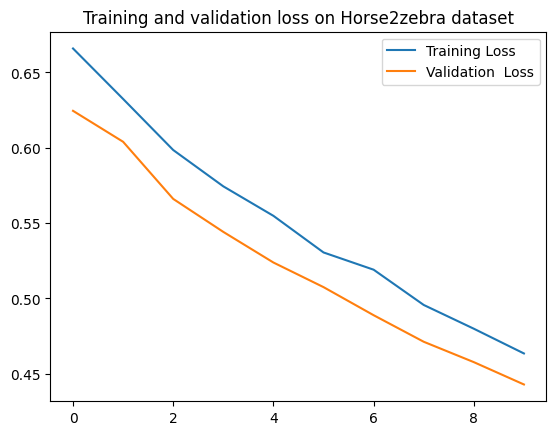

In [36]:
train_loss1 = history2.history['loss']
val_loss1 = history2.history['val_loss']
plt.plot(train_loss1, label='Training Loss')
plt.plot(val_loss1, label='Validation  Loss')
plt.legend()
plt.title('Training and validation loss on Horse2zebra dataset')
plt.show()

#with this we can conclude that the epochs should be limited to 15 as the loss is increasing after 15

GOOGLENET (Inception)

In [37]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)

In [38]:
validation_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    directory=data_directory,
    target_size=(299, 299),
    batch_size=32,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    directory=data_directory,
    target_size=(299, 299),
    batch_size=32,
    class_mode='binary'
)

Found 3000 images belonging to 2 classes.
Found 3000 images belonging to 2 classes.


In [39]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [40]:
history3 = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

Epoch 1/10
94/94 [==============================] - 67s 428ms/step - loss: 0.6671 - accuracy: 0.6510 - val_loss: 139.5022 - val_accuracy: 0.6667
Epoch 2/10
94/94 [==============================] - 29s 305ms/step - loss: 0.6390 - accuracy: 0.6667 - val_loss: 7.6688 - val_accuracy: 0.6503
Epoch 3/10
94/94 [==============================] - 29s 304ms/step - loss: 0.6423 - accuracy: 0.6647 - val_loss: 0.6388 - val_accuracy: 0.6653
Epoch 4/10
94/94 [==============================] - 28s 303ms/step - loss: 0.6396 - accuracy: 0.6657 - val_loss: 258.0616 - val_accuracy: 0.6667
Epoch 5/10
94/94 [==============================] - 29s 308ms/step - loss: 0.6405 - accuracy: 0.6667 - val_loss: 0.6700 - val_accuracy: 0.6667
Epoch 6/10
94/94 [==============================] - 29s 304ms/step - loss: 0.6385 - accuracy: 0.6667 - val_loss: 0.7238 - val_accuracy: 0.6297
Epoch 7/10
94/94 [==============================] - 28s 302ms/step - loss: 0.6375 - accuracy: 0.6667 - val_loss: 0.6423 - val_accuracy: 0.

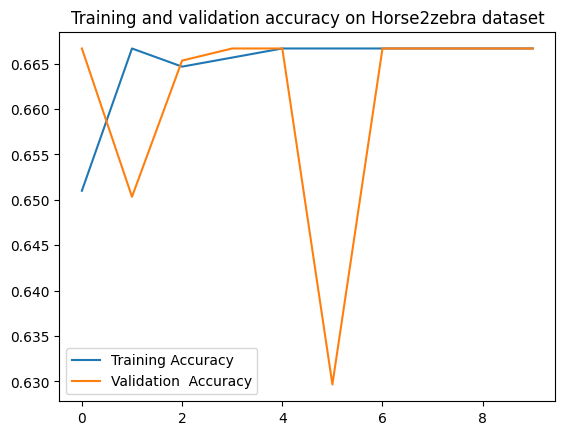

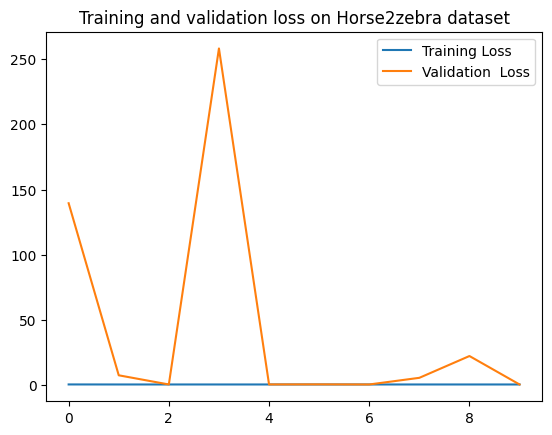

In [41]:
training_acc1 = history3.history['accuracy']
validation_acc1 = history3.history['val_accuracy']
plt.plot(training_acc1, label='Training Accuracy')
plt.plot(validation_acc1, label='Validation  Accuracy')
plt.legend()
plt.title('Training and validation accuracy on Horse2zebra dataset')
plt.show()

#with this learning curve we can say that after 15 epochs the accuracy drops hence limit the epochs to 15
train_loss1 = history3.history['loss']
val_loss1 = history3.history['val_loss']
plt.plot(train_loss1, label='Training Loss')
plt.plot(val_loss1, label='Validation  Loss')
plt.legend()
plt.title('Training and validation loss on Horse2zebra dataset')
plt.show()

#with this we can conclude that the epochs should be limited to 15 as the loss is increasing after 15

RESNET50

In [42]:
validation_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    directory=data_directory,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    directory=data_directory,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

Found 3000 images belonging to 2 classes.
Found 3000 images belonging to 2 classes.


In [43]:
from tensorflow.keras.applications import ResNet50
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)


In [44]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [45]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_3[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                        

In [46]:
history4 = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

Epoch 1/10
94/94 [==============================] - 53s 327ms/step - loss: 0.7166 - accuracy: 0.6543 - val_loss: 1.4171 - val_accuracy: 0.6667
Epoch 2/10
94/94 [==============================] - 25s 264ms/step - loss: 0.6501 - accuracy: 0.6667 - val_loss: 0.6855 - val_accuracy: 0.6667
Epoch 3/10
94/94 [==============================] - 25s 267ms/step - loss: 0.6438 - accuracy: 0.6667 - val_loss: 0.6591 - val_accuracy: 0.6667
Epoch 4/10
94/94 [==============================] - 25s 266ms/step - loss: 0.6434 - accuracy: 0.6667 - val_loss: 0.6530 - val_accuracy: 0.6667
Epoch 5/10
94/94 [==============================] - 25s 265ms/step - loss: 0.6414 - accuracy: 0.6667 - val_loss: 0.6535 - val_accuracy: 0.6667
Epoch 6/10
94/94 [==============================] - 25s 268ms/step - loss: 0.6387 - accuracy: 0.6667 - val_loss: 0.6503 - val_accuracy: 0.6667
Epoch 7/10
94/94 [==============================] - 25s 267ms/step - loss: 0.6391 - accuracy: 0.6663 - val_loss: 0.6365 - val_accuracy: 0.6667

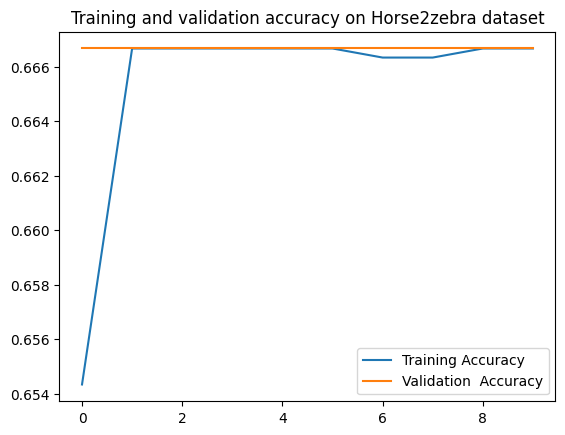

In [47]:
training_acc1 = history4.history['accuracy']
validation_acc1 = history4.history['val_accuracy']
plt.plot(training_acc1, label='Training Accuracy')
plt.plot(validation_acc1, label='Validation  Accuracy')
plt.legend()
plt.title('Training and validation accuracy on Horse2zebra dataset')
plt.show()

#with this learning curve we can say that after 15 epochs the accuracy drops hence limit the epochs to 15

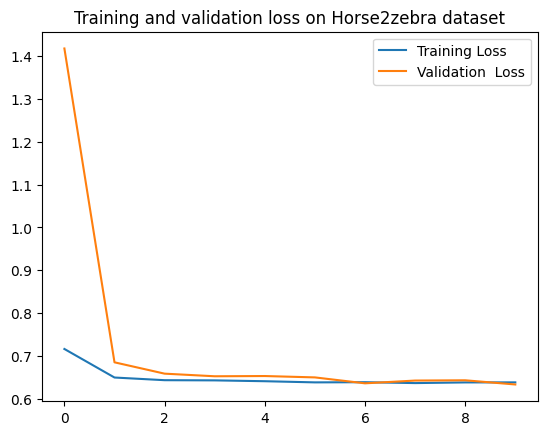

In [48]:
train_loss1 = history4.history['loss']
val_loss1 = history4.history['val_loss']
plt.plot(train_loss1, label='Training Loss')
plt.plot(val_loss1, label='Validation  Loss')
plt.legend()
plt.title('Training and validation loss on Horse2zebra dataset')
plt.show()

#with this we can conclude that the epochs should be limited to 15 as the loss is increasing after 15

EFFICIENTNETB0

In [49]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

In [50]:
validation_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    directory=data_directory,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    directory=data_directory,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

Found 3000 images belonging to 2 classes.
Found 3000 images belonging to 2 classes.


In [51]:
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)


16705208/16705208 [==============================] - 3s 0us/step


In [52]:
history5 = model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [53]:
training_acc1 = history5.history['accuracy']
validation_acc1 = history5.history['val_accuracy']
plt.plot(training_acc1, label='Training Accuracy')
plt.plot(validation_acc1, label='Validation  Accuracy')
plt.legend()
plt.title('Training and validation accuracy on Horse2zebra dataset')
plt.show()

#with this learning curve we can say that after 15 epochs the accuracy drops hence limit the epochs to 15

AttributeError: 'NoneType' object has no attribute 'history'

In [ ]:
train_loss1 = history5.history['loss']
val_loss1 = history5.history['val_loss']
plt.plot(train_loss1, label='Training Loss')
plt.plot(val_loss1, label='Validation  Loss')
plt.legend()
plt.title('Training and validation loss on Horse2zebra dataset')
plt.show()

#with this we can conclude that the epochs should be limited to 15 as the loss is increasing after 15

MOBILENETV2

In [ ]:
model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D


In [ ]:
validation_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    'path_to_train_directory',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    'path_to_validation_directory',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

In [ ]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
history6 = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

In [ ]:
training_acc1 = history6.history['accuracy']
validation_acc1 = history6.history['val_accuracy']
plt.plot(training_acc1, label='Training Accuracy')
plt.plot(validation_acc1, label='Validation  Accuracy')
plt.legend()
plt.title('Training and validation accuracy on Horse2zebra dataset')
plt.show()

#with this learning curve we can say that after 15 epochs the accuracy drops hence limit the epochs to 15

In [ ]:
train_loss1 = history6.history['loss']
val_loss1 = history6.history['val_loss']
plt.plot(train_loss1, label='Training Loss')
plt.plot(val_loss1, label='Validation  Loss')
plt.legend()
plt.title('Training and validation loss on Horse2zebra dataset')
plt.show()

#with this we can conclude that the epochs should be limited to 15 as the loss is increasing after 15